## Final Project Submission

Please fill out:
* Student name: Jonah Flateman
* Student pace: self paced
* Scheduled project review date/time: 4/5/21 12:00pm
* Instructor name: Jeff Herman
* Blog post URL: https://jonahflateman.github.io/module_2_project_-_predicting_home_sale_prices_in_king_county_wa


# Data importing and cleaning

In [1]:
#Importing libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [2]:
#Import data and display head and attributes
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
print(df['waterfront'].value_counts())
print(df['view'].value_counts())
print(df['yr_renovated'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [7]:
#waterfront and view columns look to be categorical so we can replace Nan values with 0
df['waterfront'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)

Let's bin the 'yr_renovated' variable to a categorical one representing renovations done every 10 years.  For renevations older or never done we will assign a "0" and then increase incrementally by 1 every 10 years.

In [8]:
#change yr_renovated to categorical variable
df['yr_renovated'].fillna(0, inplace=True)
df['yr_renovated'] = np.where(df['yr_renovated'].between(2006,2015), 3, df['yr_renovated']).astype(int)
df['yr_renovated'] = np.where(df['yr_renovated'].between(1996,2005), 2, df['yr_renovated']).astype(int)
df['yr_renovated'] = np.where(df['yr_renovated'].between(1986,1995), 1, df['yr_renovated']).astype(int)
df['yr_renovated'] = np.where(df['yr_renovated'].between(1934,1985), 0, df['yr_renovated']).astype(int)

In [9]:
#rename column
df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)
df['renovated'].value_counts()

0    21016
3      236
2      197
1      148
Name: renovated, dtype: int64

In [10]:
#dropping id column
df = df.drop(['id'], axis=1)

We may be able to identify trends in the year and month so we will split the 'date' column into two new separate columns.

In [11]:
#splitting date into month and year columns, removing day
full_date = df['date'].str.split('/', expand=True)

In [12]:
df['sale_month'] = full_date[0].astype(int)
df['sale_year'] = full_date[2].astype(int)
df = df.drop(['date'], axis=1)

We should replace '?' with 0 in the 'sqft_basement column for consistency.

In [13]:
#replacing '?' with 0 in sqft_basement
df['sqft_basement'] = df['sqft_basement'].replace('?', 0).astype(float)

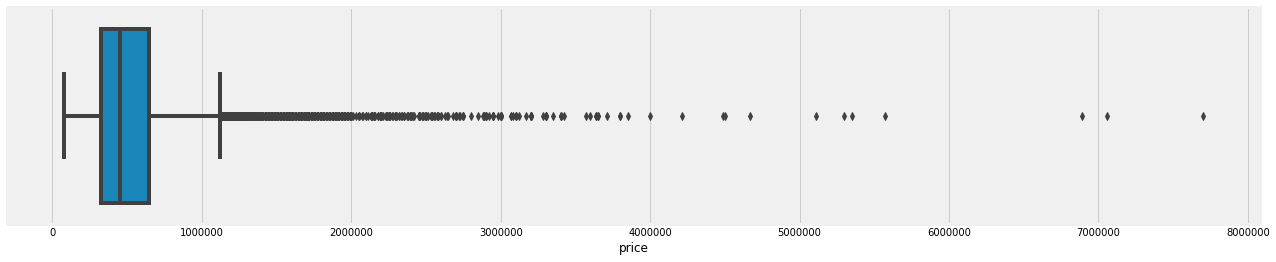

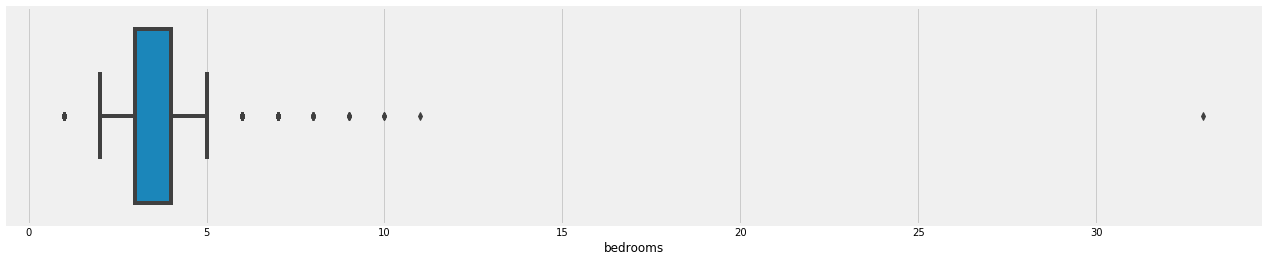

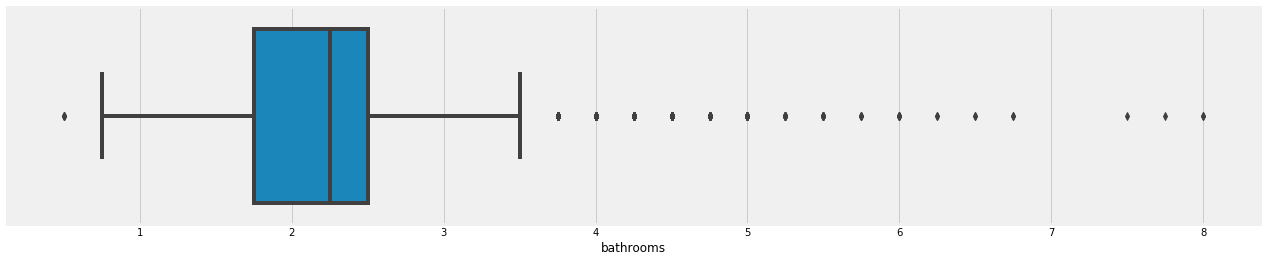

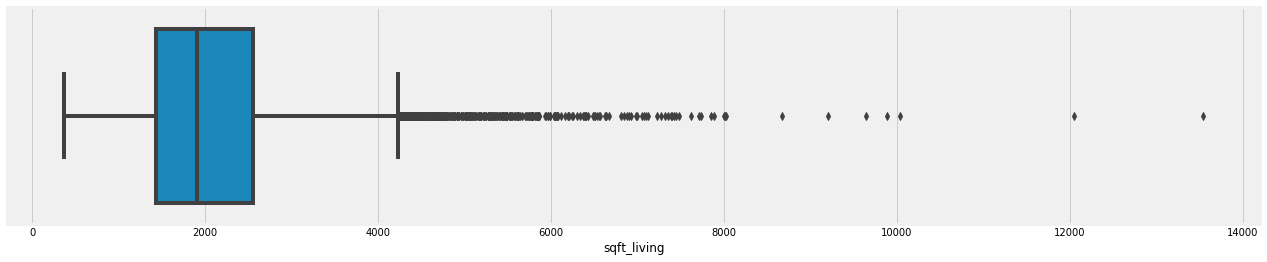

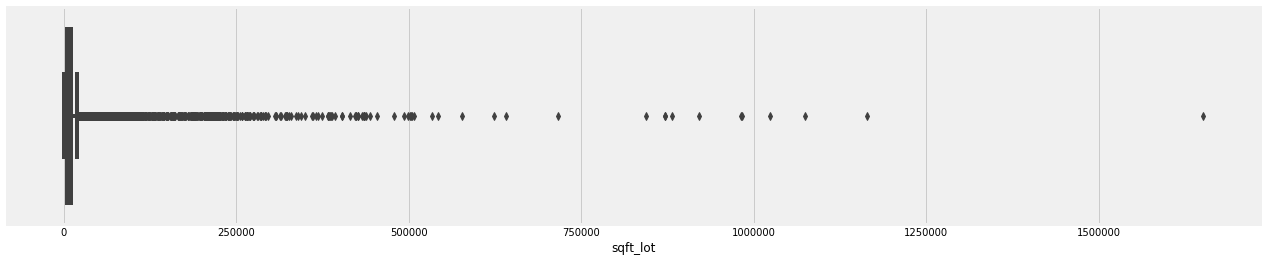

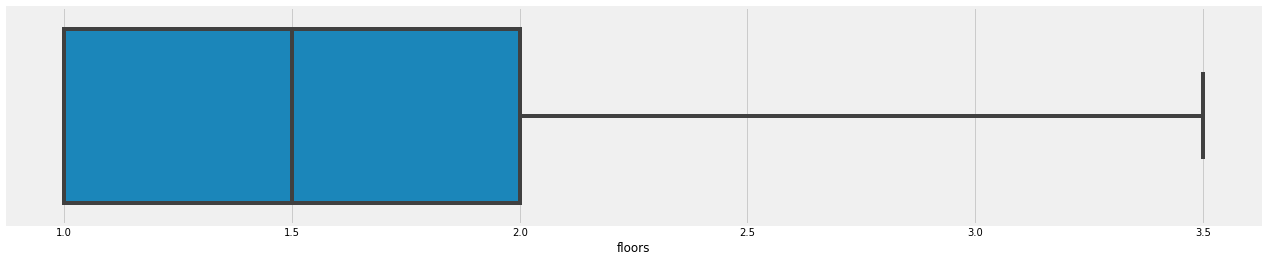

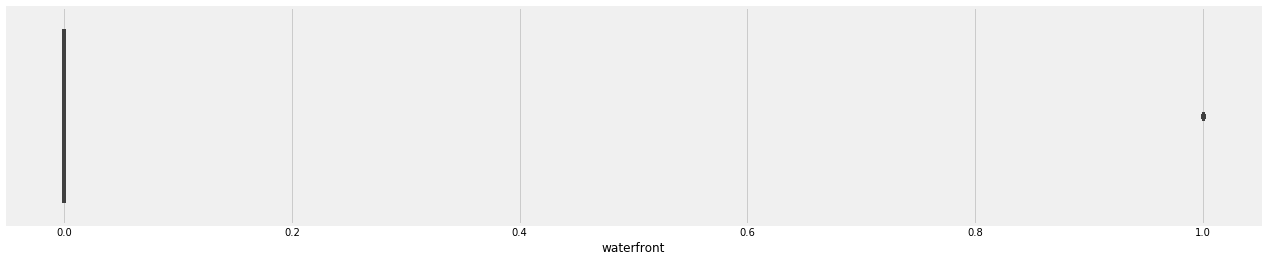

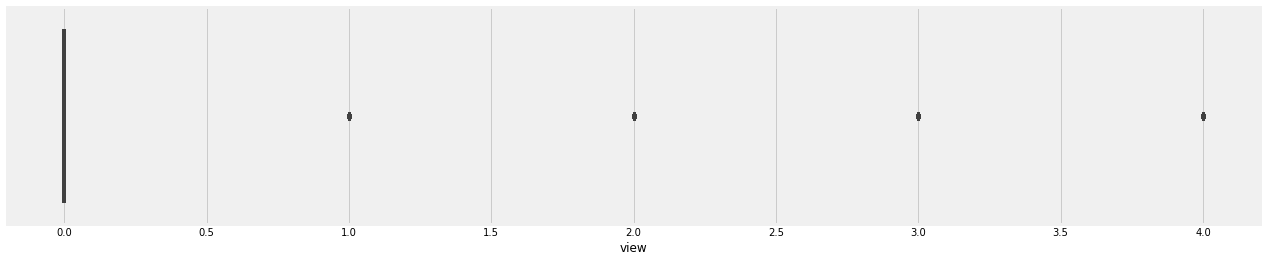

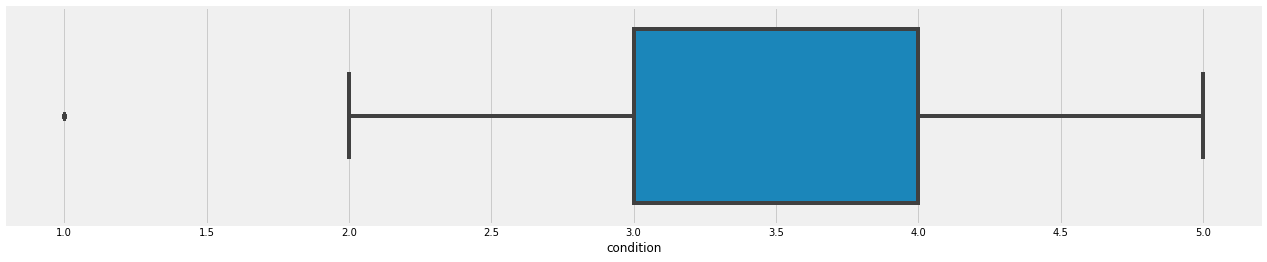

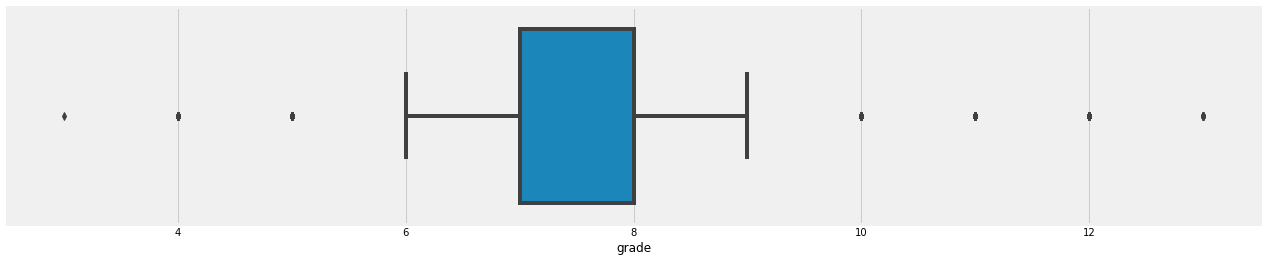

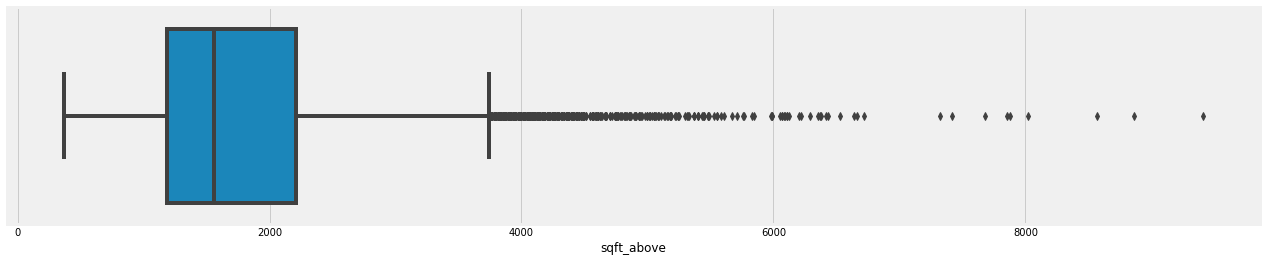

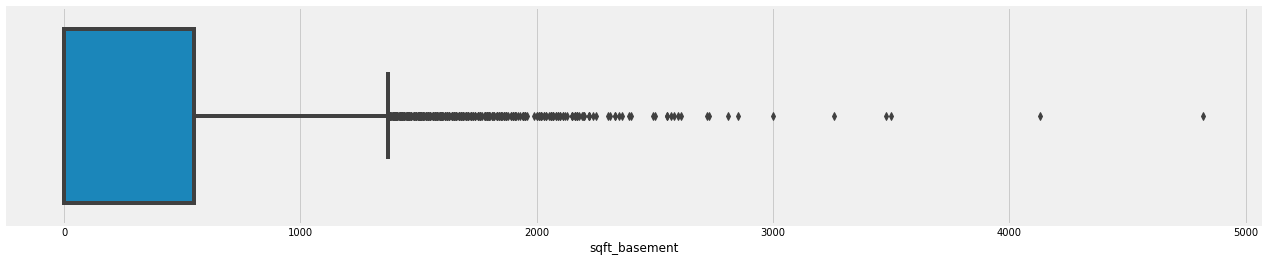

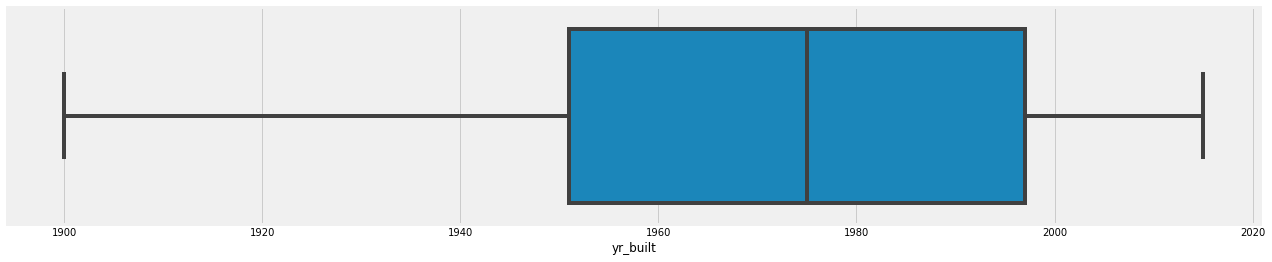

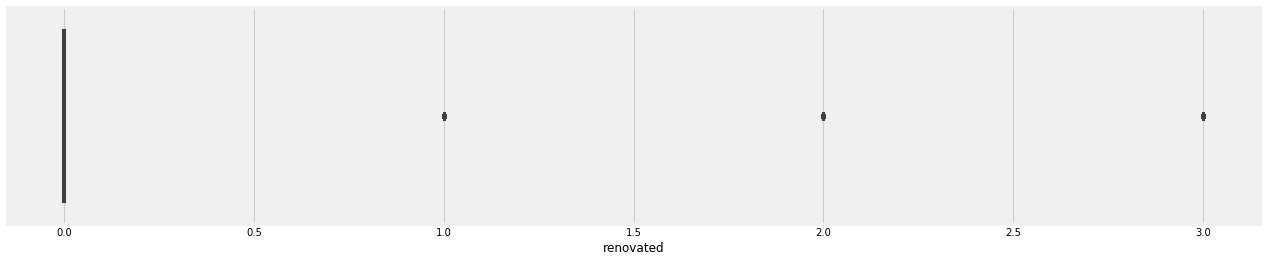

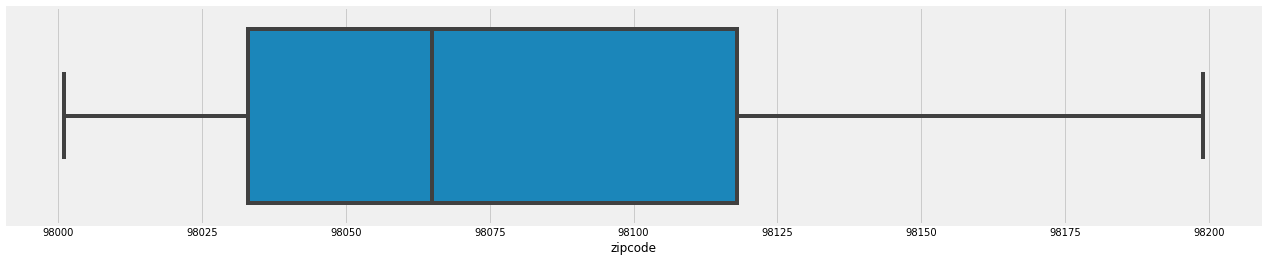

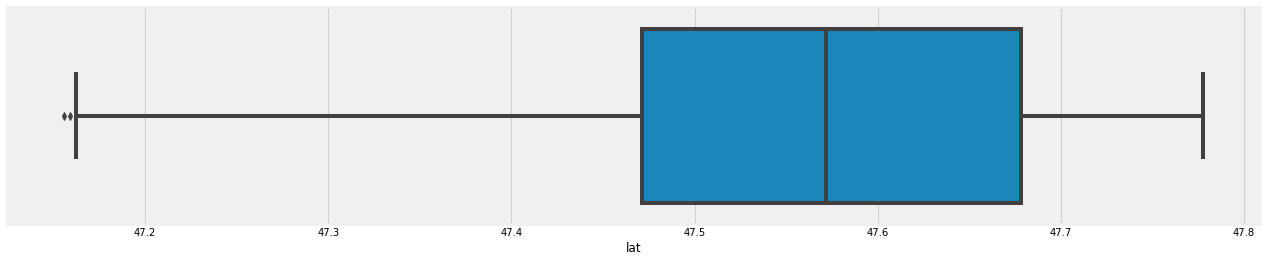

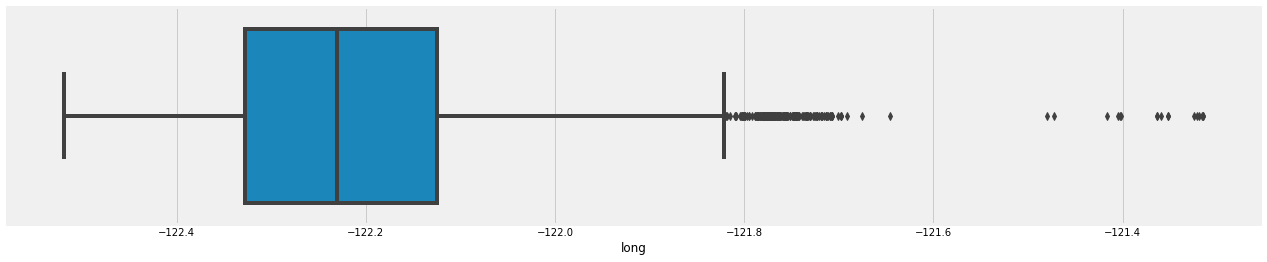

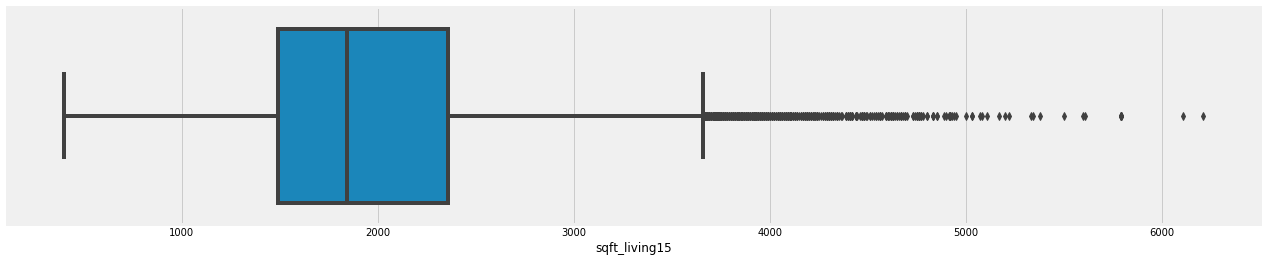

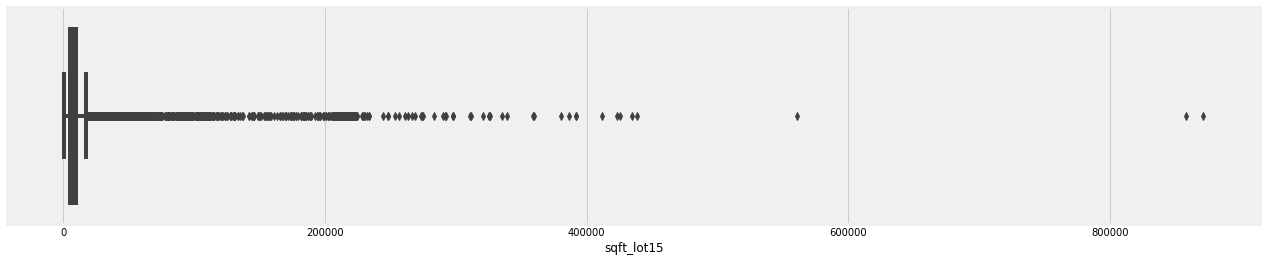

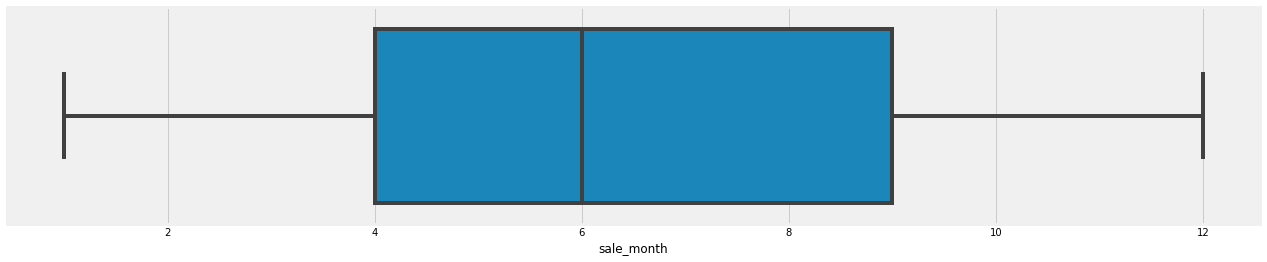

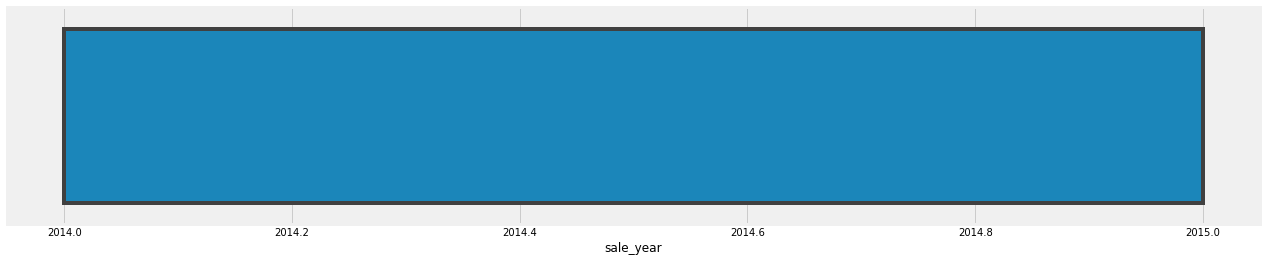

In [14]:
#Identifying and removing outliers using boxplots
for column in df.columns:
    plt.figure(figsize=(20,4))
    plt.rcParams.update({'figure.max_open_warning': 0})
    sns.boxplot(x=df[column])

We will remove some outliers for certain variables to avoid skewing our models.

In [15]:
df = df[df['bedrooms'] < 7]
df = df[df['bathrooms'] < 5]
df = df[df['sqft_living'] < 7000]
df = df[df['sqft_lot'] < 400000]
df = df[df['sqft_above'] < 5000]
df = df[df['sqft_basement'] < 2000]
df = df[df['sqft_living'] < 4500]
df = df[df['sqft_lot15'] < 200000]

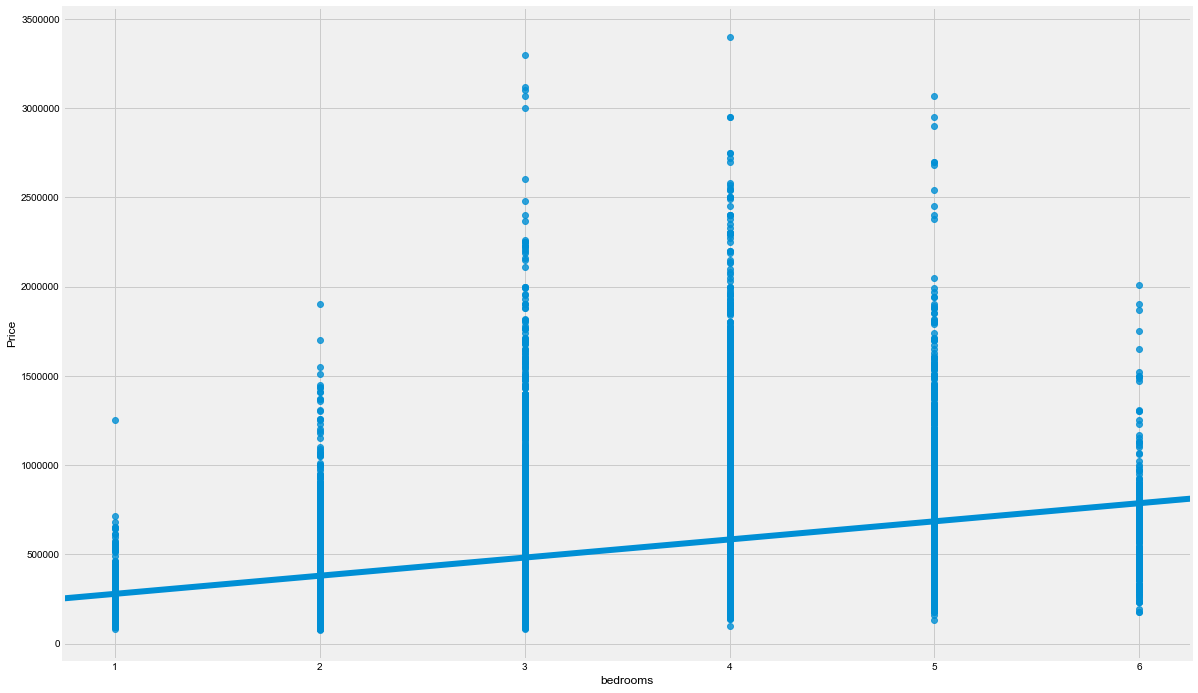

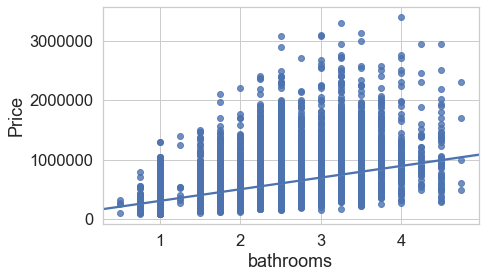

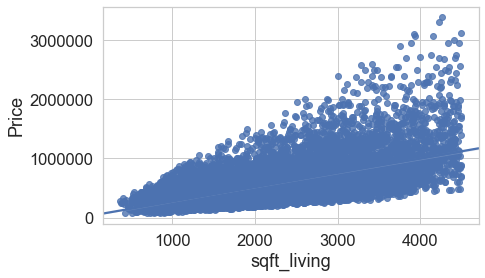

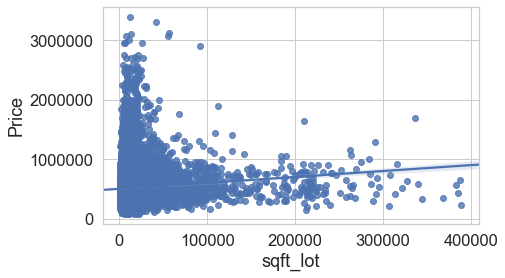

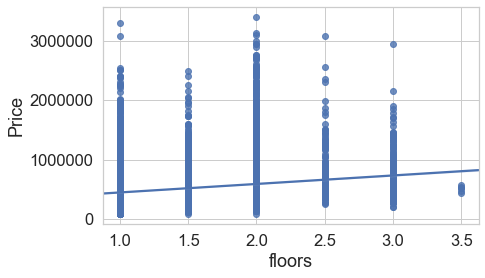

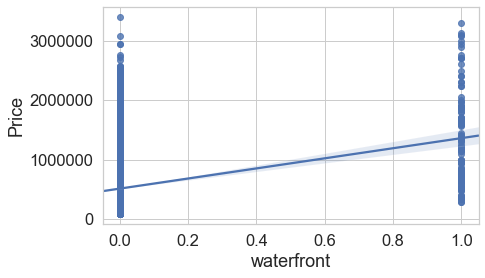

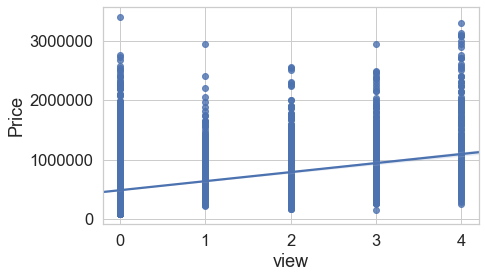

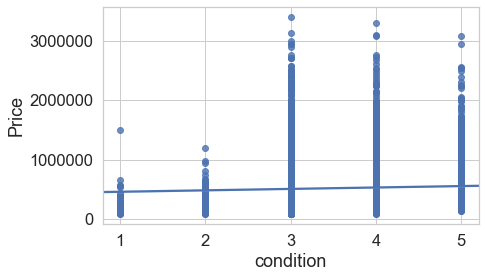

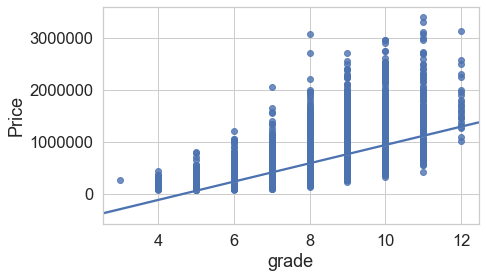

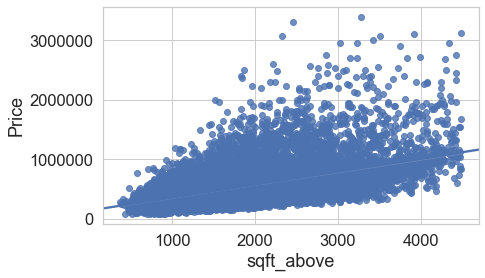

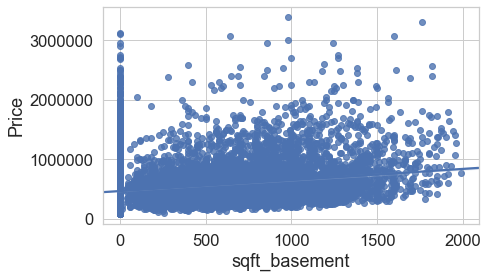

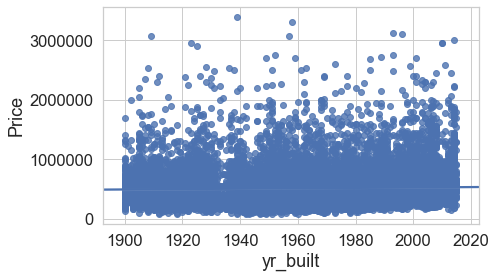

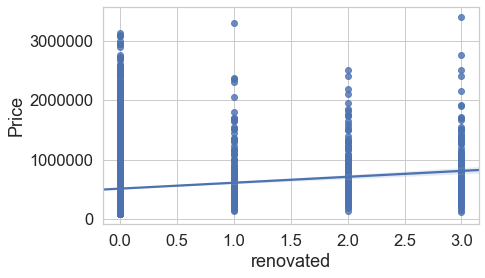

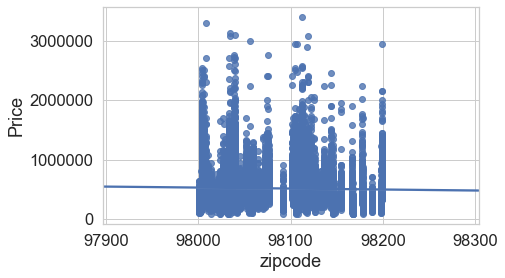

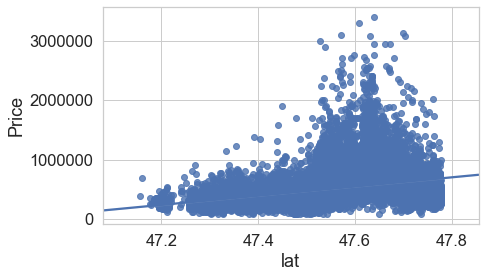

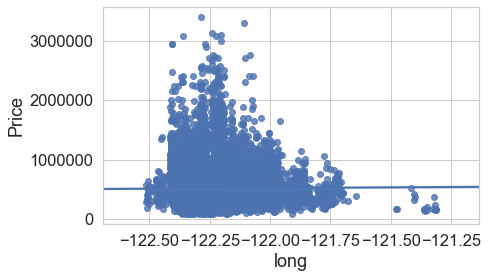

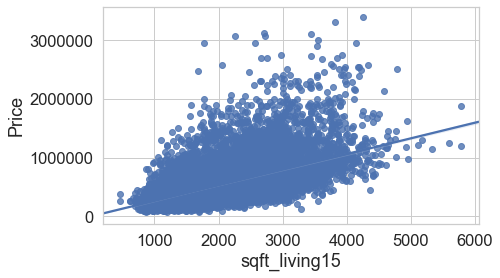

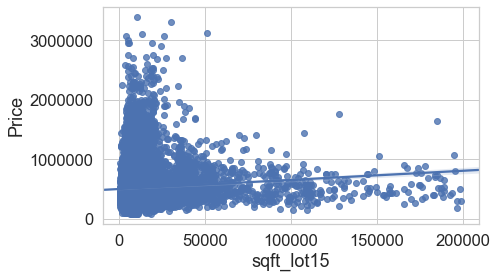

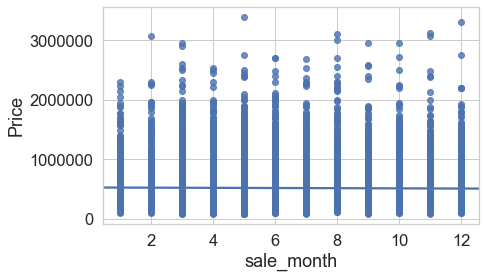

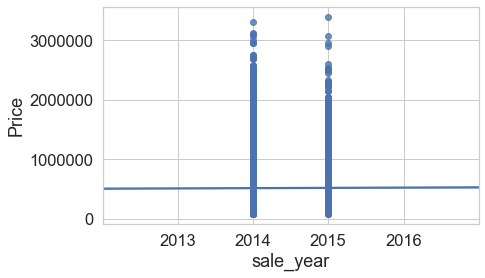

In [16]:
#Using regplots to look at relationships between price and features
fig, ax = plt.subplots(figsize=(18,12))
df_drop_price = df.drop(columns=['price'], axis=1)
for column in df_drop_price.columns:
    ax = sns.regplot(column, df.price, data=df)
    ax.set(xlabel=column, ylabel='Price')
    sns.set(style='whitegrid', font_scale=1.5)
    plt.show()

We'll be using 'sqft_living,' or interior square footage quite a bit - let's label and have a look at a larger regplot.

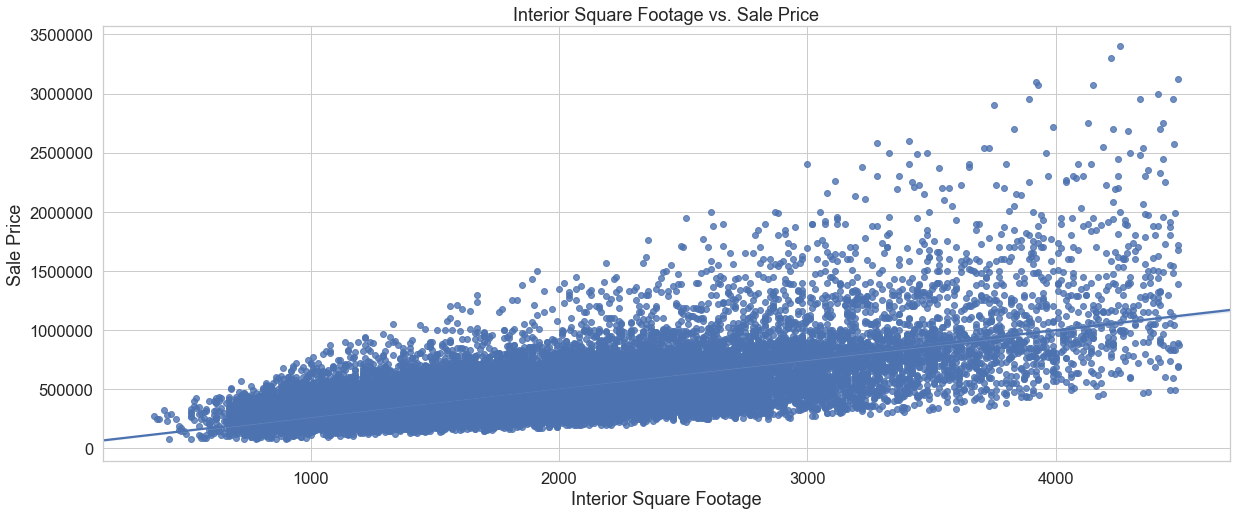

In [17]:
plt.figure(figsize=(18,8))
sns.regplot(df.sqft_living, df.price, data=df)
plt.xlabel('Interior Square Footage')
plt.ylabel('Sale Price')
plt.title('Interior Square Footage vs. Sale Price')
plt.show()

Looking at the regplots above, we can see linear relationships in our 'sqft_living, 'sqft_above,' and 'sqft_living15' continuous variable.  These are not as clear with our categorical variables , so our next step will be to check our correlations.

# Multicollinearity

Text(0.5, 1, 'Feature Correlation')

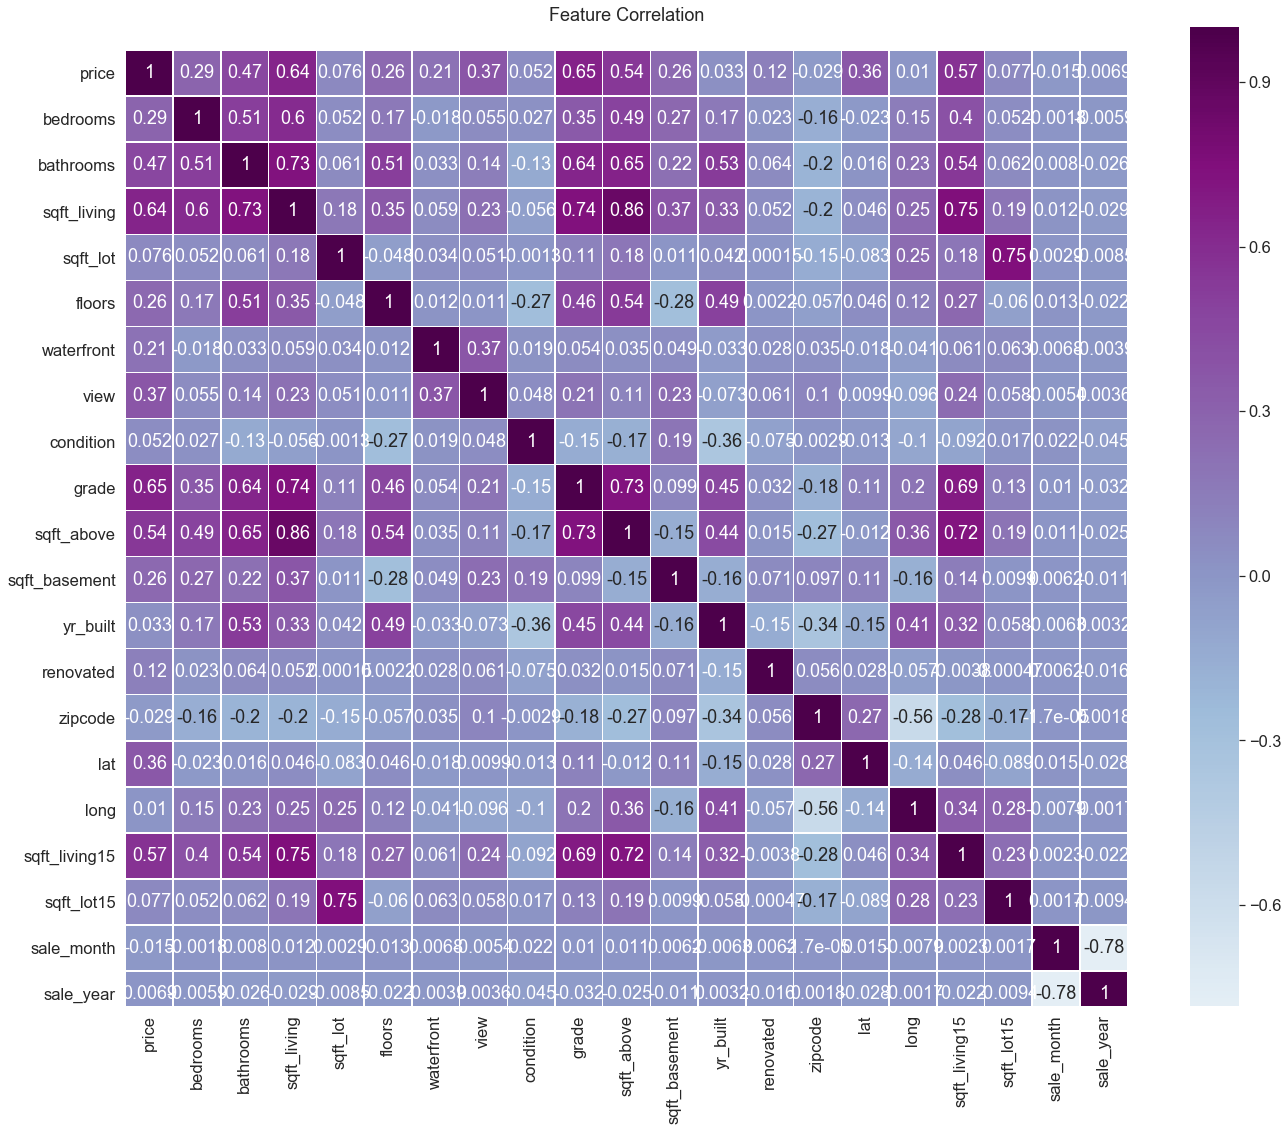

In [18]:
#Overview using heatmap
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(df.corr(), annot=True, center=0, linewidth=.5, ax=ax, cmap="BuPu")
ax.set_ylim(len(df.corr())-0.25, -0.5)
plt.title('Feature Correlation')

Here we can visualize some higher correlations, several appear to be related to square footage.  Let's look at these in a custom DataFrame.

In [19]:
df_multi = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_multi['pairs'] = list(zip(df_multi['level_0'], df_multi['level_1']))
df_multi.set_index(['pairs'], inplace=True)
df_multi.head(50)

,level_0,level_1,0
pairs,,,
"(price, price)",price,price,1.000000
"(sqft_basement, sqft_basement)",sqft_basement,sqft_basement,1.000000
"(sqft_living, sqft_living)",sqft_living,sqft_living,1.000000
"(sqft_lot, sqft_lot)",sqft_lot,sqft_lot,1.000000
"(floors, floors)",floors,floors,1.000000
"(waterfront, waterfront)",waterfront,waterfront,1.000000
"(view, view)",view,view,1.000000
"(condition, condition)",condition,condition,1.000000
"(grade, grade)",grade,grade,1.000000


Let's use 'sqft_living' - footage of the home - as a key feature variable and remove all other square footage variables.  We can also remove the highly correlated 'grade' column as well as 'sale_year' which being from only two years does not seem particularly relevant in this case.

In [20]:
#Dropping highly correlated columns
columns_to_drop = ['sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'sale_year', 'grade']
df.drop(columns_to_drop, axis=1, inplace=True)

Let's make our zipcode feature more useful as a categorical variable.  We will take the price means of each zipcode and split them into quantiles, returning a categorical variable from 1 to 4 with 4 representing the highest quantile of average price.  This can also replace our 'lat' and 'long' columns.

In [21]:
#Categorizing the zipcode feature to use in place of zipcode, lat, and long.  First resetting index:
df = df.reset_index()

In [22]:
#Using groupby and mean to obtain frequency and mean of each zip
frequency = df.groupby('zipcode').count()['index']

In [23]:
mean = df.groupby('zipcode').mean()['price'].astype(int)

In [24]:
#Creating unique dataframe 
df_zip = pd.concat([frequency, mean], axis=1)
df_zip['zipcode'] = df_zip.index
df_zip.columns = ['frequency', 'price', 'zipcode']

In [25]:
df_zip.describe()

,frequency,price,zipcode
count,70.000000,7.000000e+01,70.000000
mean,299.500000,5.320947e+05,98077.300000
std,141.753588,2.493387e+05,56.622408
min,37.000000,2.333980e+05,98001.000000
25%,198.750000,3.478922e+05,98029.250000
50%,277.500000,4.751555e+05,98067.500000
75%,399.500000,6.331880e+05,98117.750000
max,599.000000,1.665000e+06,98199.000000


In [26]:
df_zip.quantile(0.25)

frequency       198.75
price        347892.25
zipcode       98029.25
Name: 0.25, dtype: float64

In [27]:
df_zip.quantile(0.50)

frequency       277.5
price        475155.5
zipcode       98067.5
Name: 0.5, dtype: float64

In [28]:
df_zip.quantile(0.75)

frequency       399.50
price        633188.00
zipcode       98117.75
Name: 0.75, dtype: float64

In [29]:
#Use function to split by quantile and apply to original dataframe
first_quantile = df_zip[df_zip.price < 347892.25]    
second_quantile = df_zip[df_zip.price.between(347892.25, 475155.5)] 
third_quantile = df_zip[df_zip.price.between(475155.5, 633188.00)] 
fourth_quantile = df_zip[df_zip.price > 633188.00]

In [30]:
def zipcode_category(zipcode):
    if zipcode in first_quantile.index:
        return 1
    elif zipcode in second_quantile.index:
        return 2
    elif zipcode in third_quantile.index:
        return 3
    else:
        return 4

In [31]:
df['zipcode_category'] = df.zipcode.apply(zipcode_category).astype(int)

In [32]:
df.zipcode_category.value_counts()

3    6029
1    5097
4    4936
2    4903
Name: zipcode_category, dtype: int64

Text(0, 0.5, 'Price')

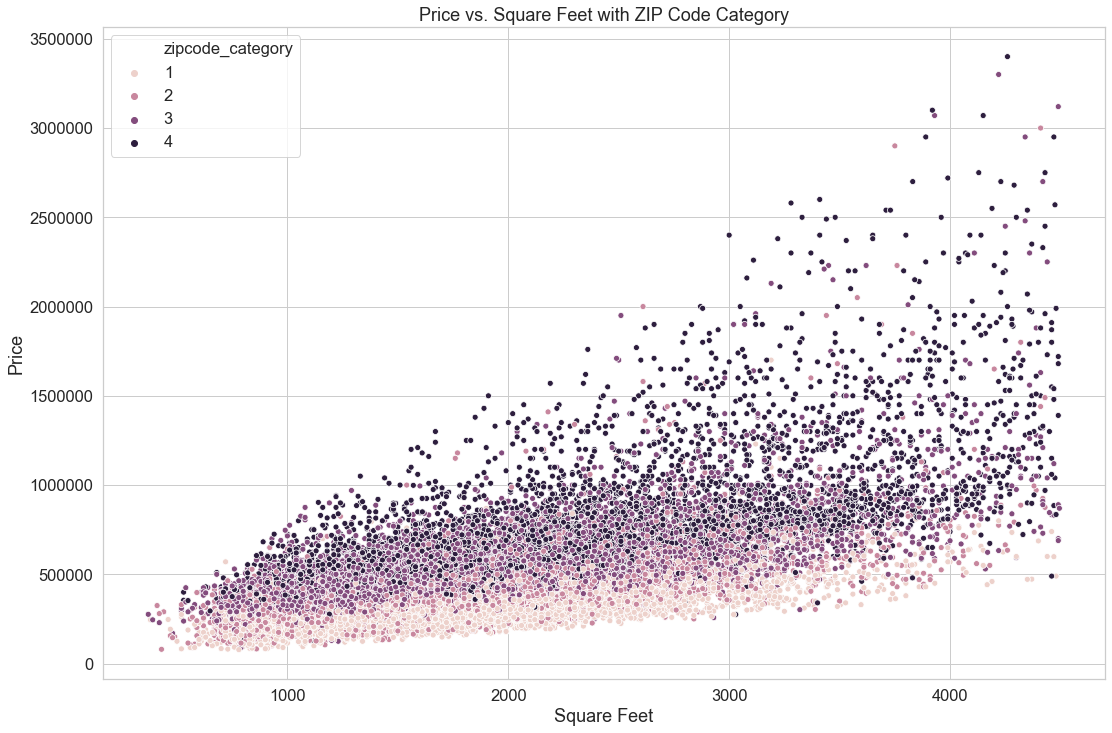

In [33]:
#Adding zipcode category to scatterplot
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x="sqft_living", y="price", data=df, hue="zipcode_category")
plt.title("Price vs. Square Feet with ZIP Code Category")
plt.xlabel("Square Feet")
plt.ylabel("Price")

From this scatterplot we can see a linear relationship between zipcode and price vs. square feet; the differences with categories 1 and 4 homes are a bit easier to spot.

In [34]:
#Dropping unnecessary columns
columns_to_drop2 = ['zipcode', 'lat', 'long', 'index']
df.drop(columns_to_drop2, axis=1, inplace=True)

Our regplots earlier didn't give us too much insight into our categorical variables, so let's plot those compared to price using boxplots.

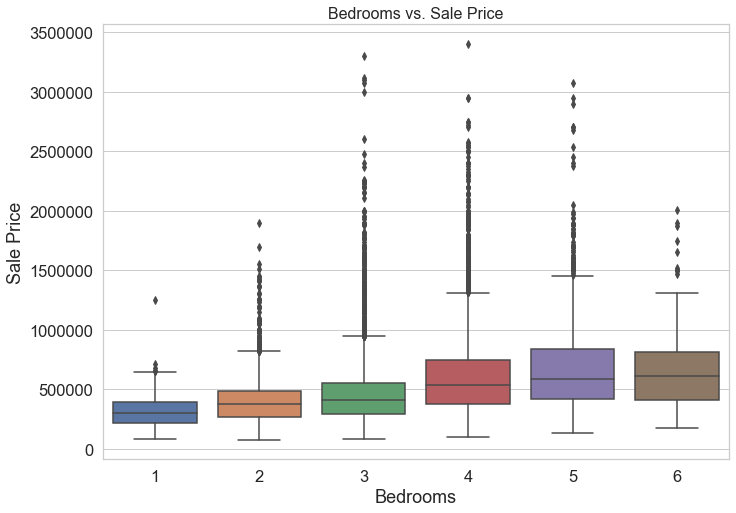

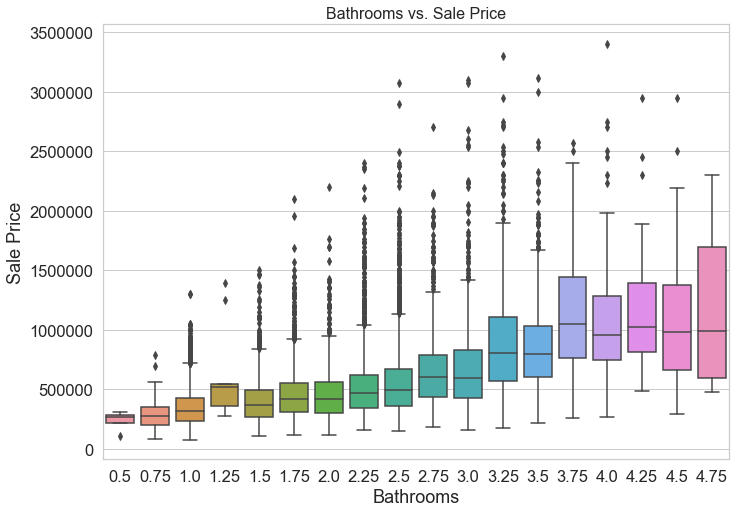

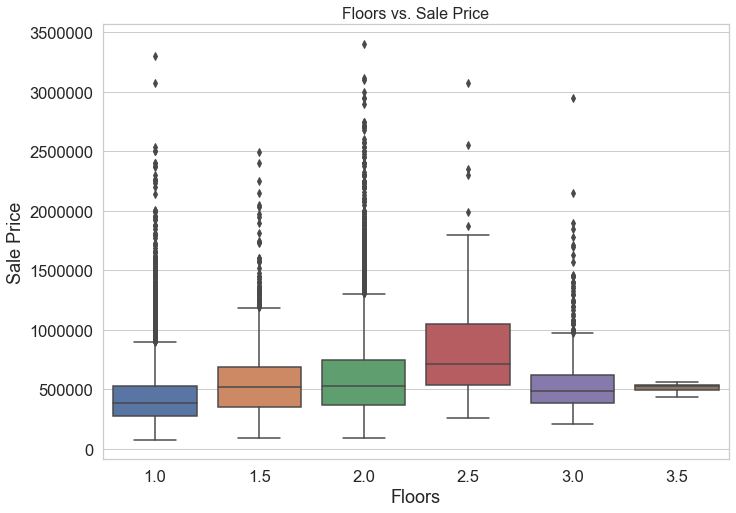

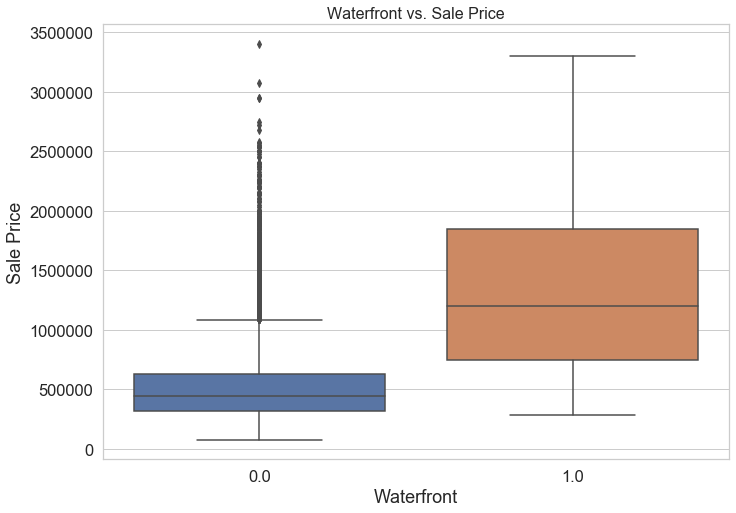

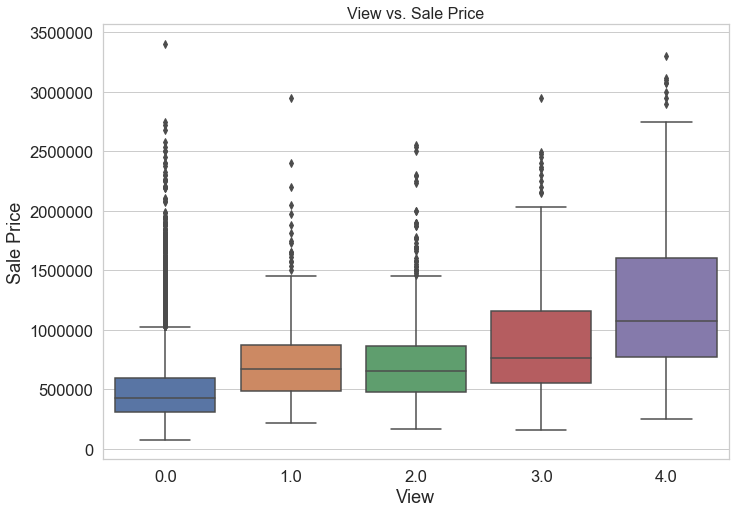

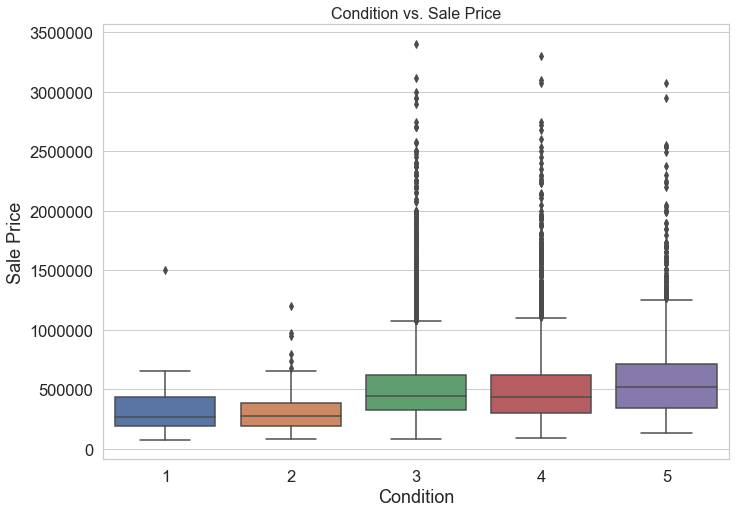

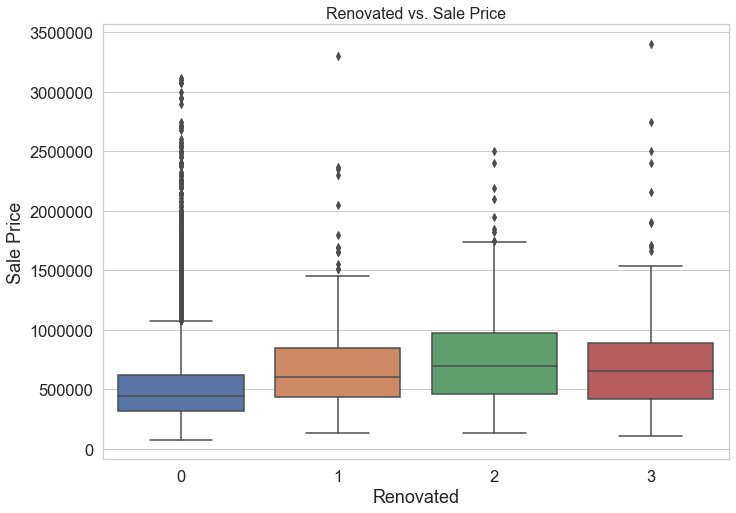

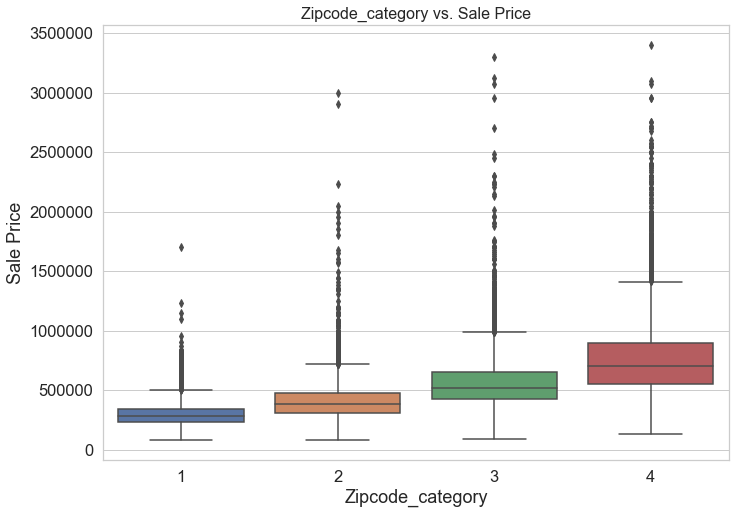

In [35]:
#Boxplots of categorical relationships to price
categoricals_to_plot = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'renovated', 'zipcode_category']
for categorical in categoricals_to_plot:
    plt.figure(figsize=(10, 8))
    plt.title(f'{categorical.capitalize()} vs. Sale Price', fontsize=16)
    sns.boxplot(df[categorical], df.price)
    plt.xlabel(categorical.capitalize())
    plt.ylabel('Sale Price')

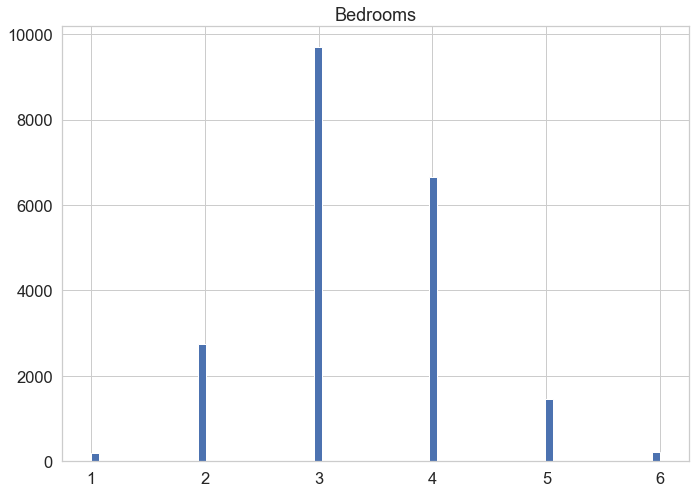

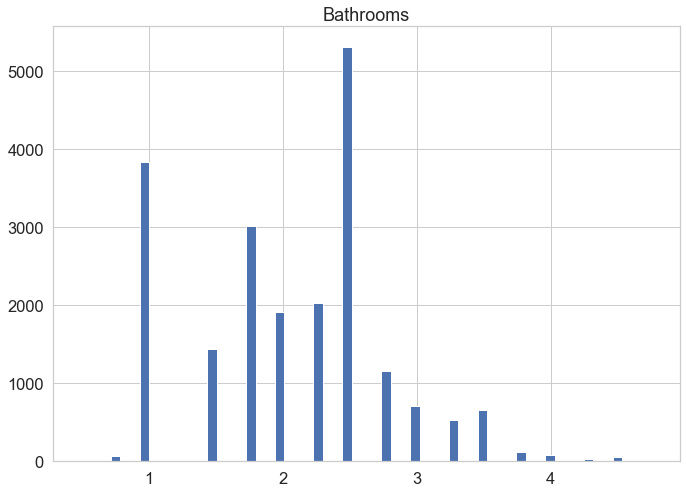

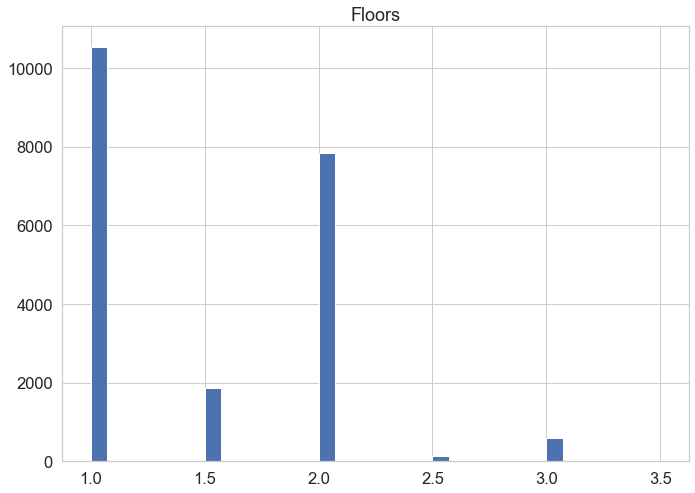

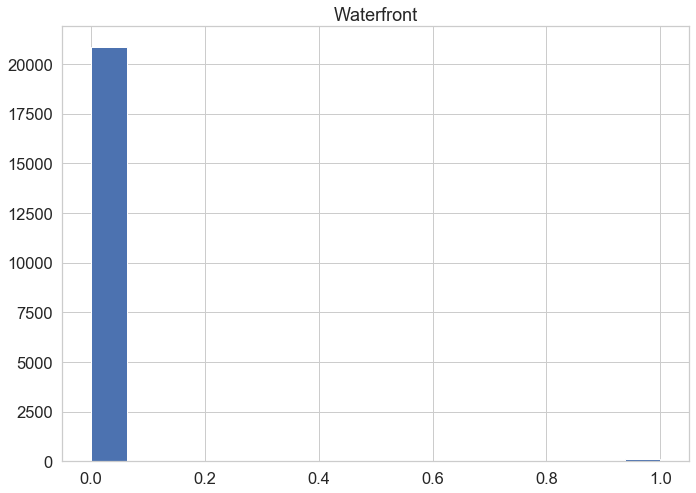

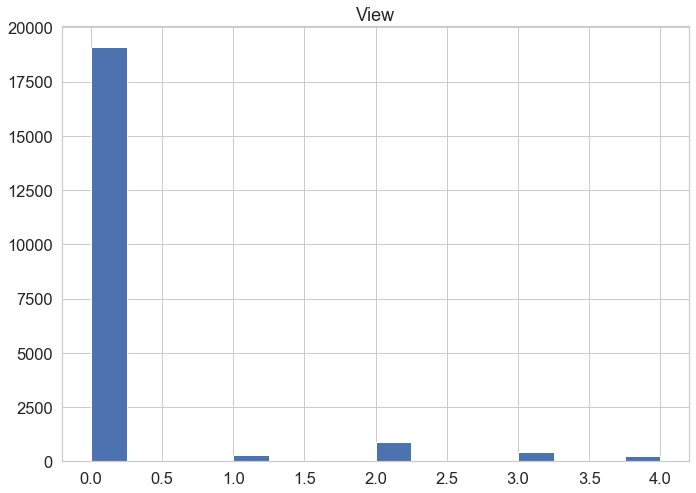

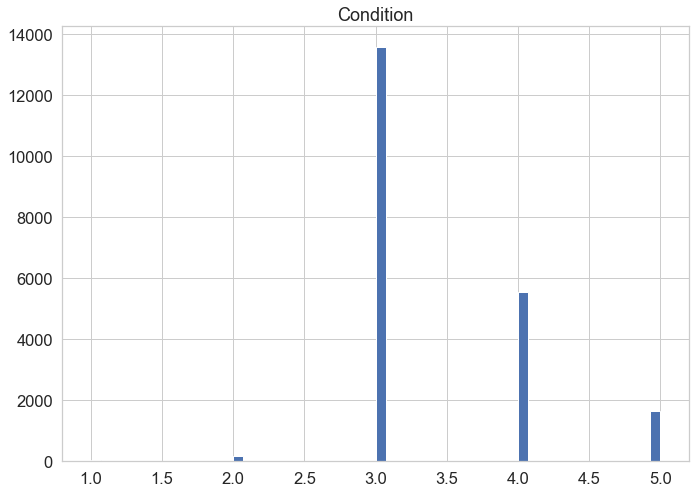

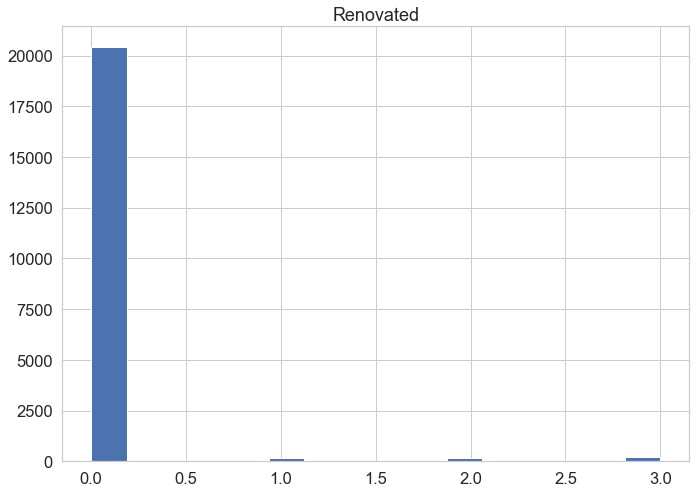

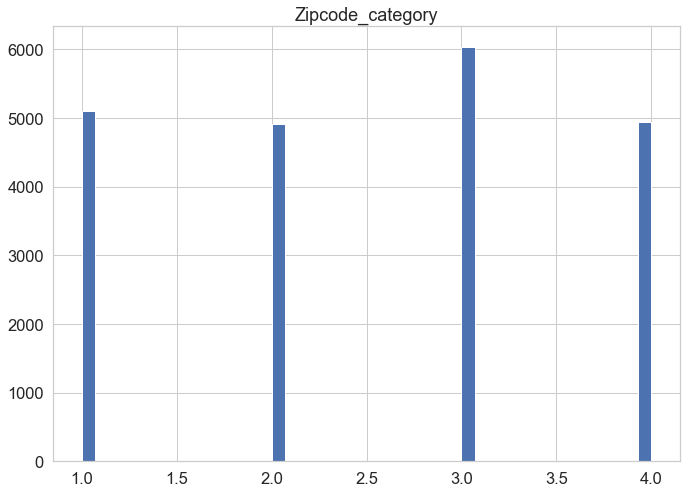

In [36]:
#Histograms for reference
for categorical in categoricals_to_plot:
    plt.figure(figsize=(10, 8))
    plt.hist(df[categorical], bins='auto')
    plt.title(categorical.capitalize())

Text(0, 0.5, 'Number of Homes')

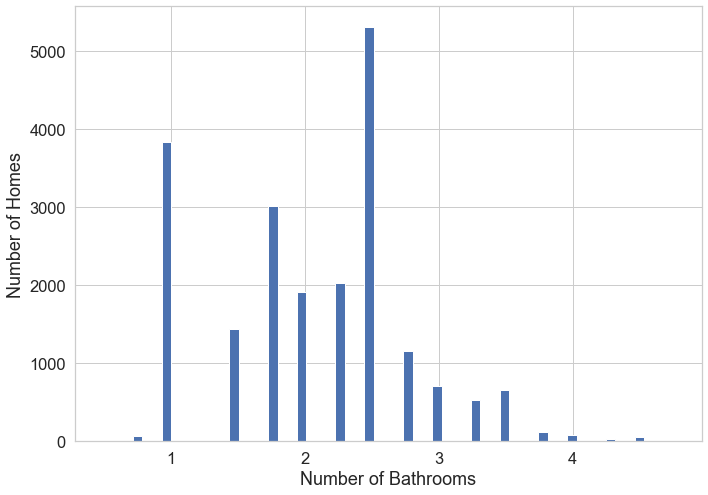

In [37]:
plt.figure(figsize=(10,8))
plt.hist(df['bathrooms'], bins='auto')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Homes')

# Normalization and scaling

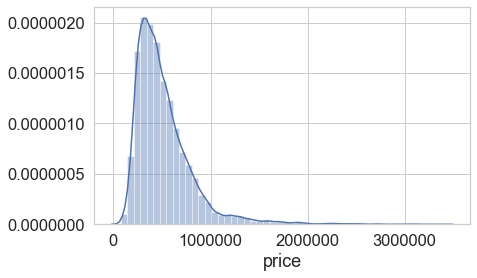

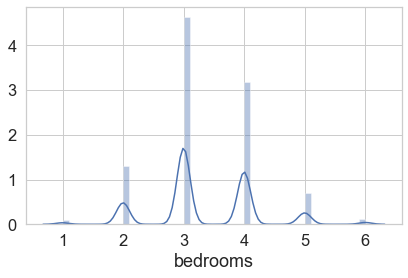

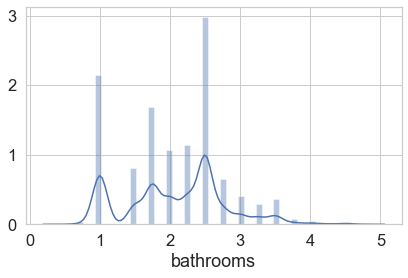

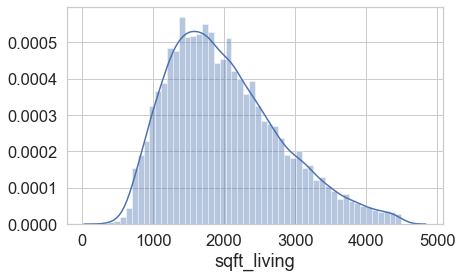

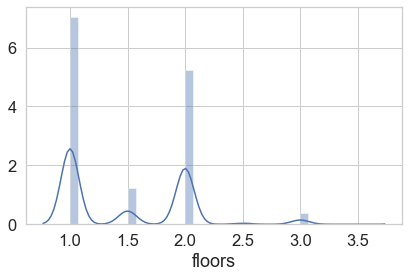

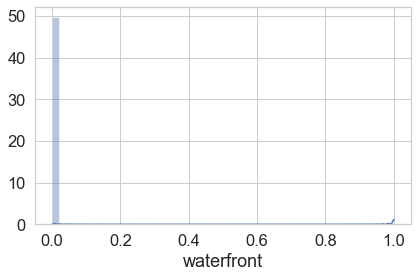

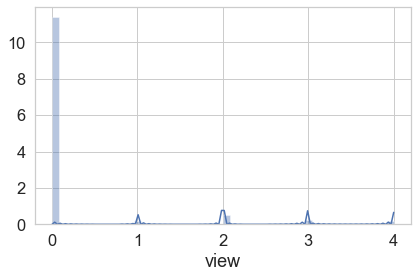

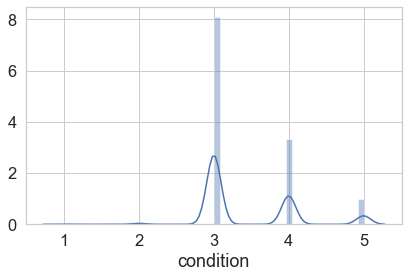

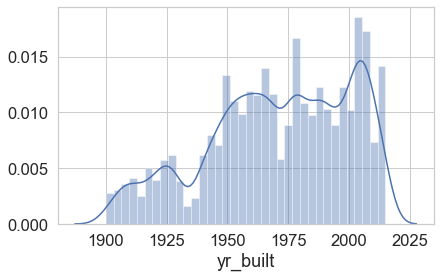

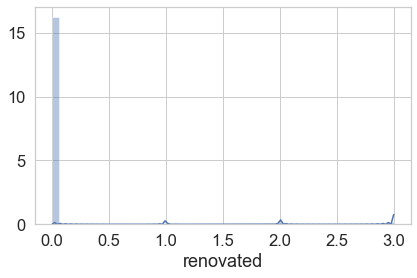

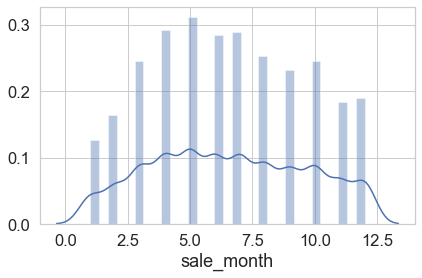

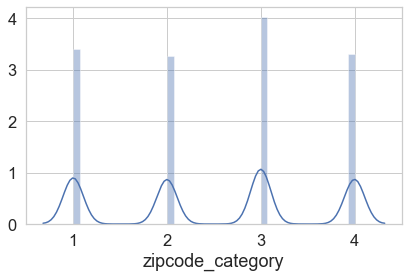

In [38]:
#Creating distplots
for column in df.columns:
    plt.subplots(1,1)
    sns.distplot(df[column])

Our engineered 'renovated' column should be more useful than 'yr_built' which can be dropped.  While 'sale_month' does show us more sales during the summer months, this is probably not reliable enough to use in our modeling.

In [39]:
#We can drop more columns
columns_to_drop3 = ['yr_built', 'sale_month']
df.drop(columns_to_drop3, axis=1, inplace=True)

We saw skewed distributions on our continuous variables above, so we will use log transformations on these columns and then scale our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b77002e8>,
      dtype=object)

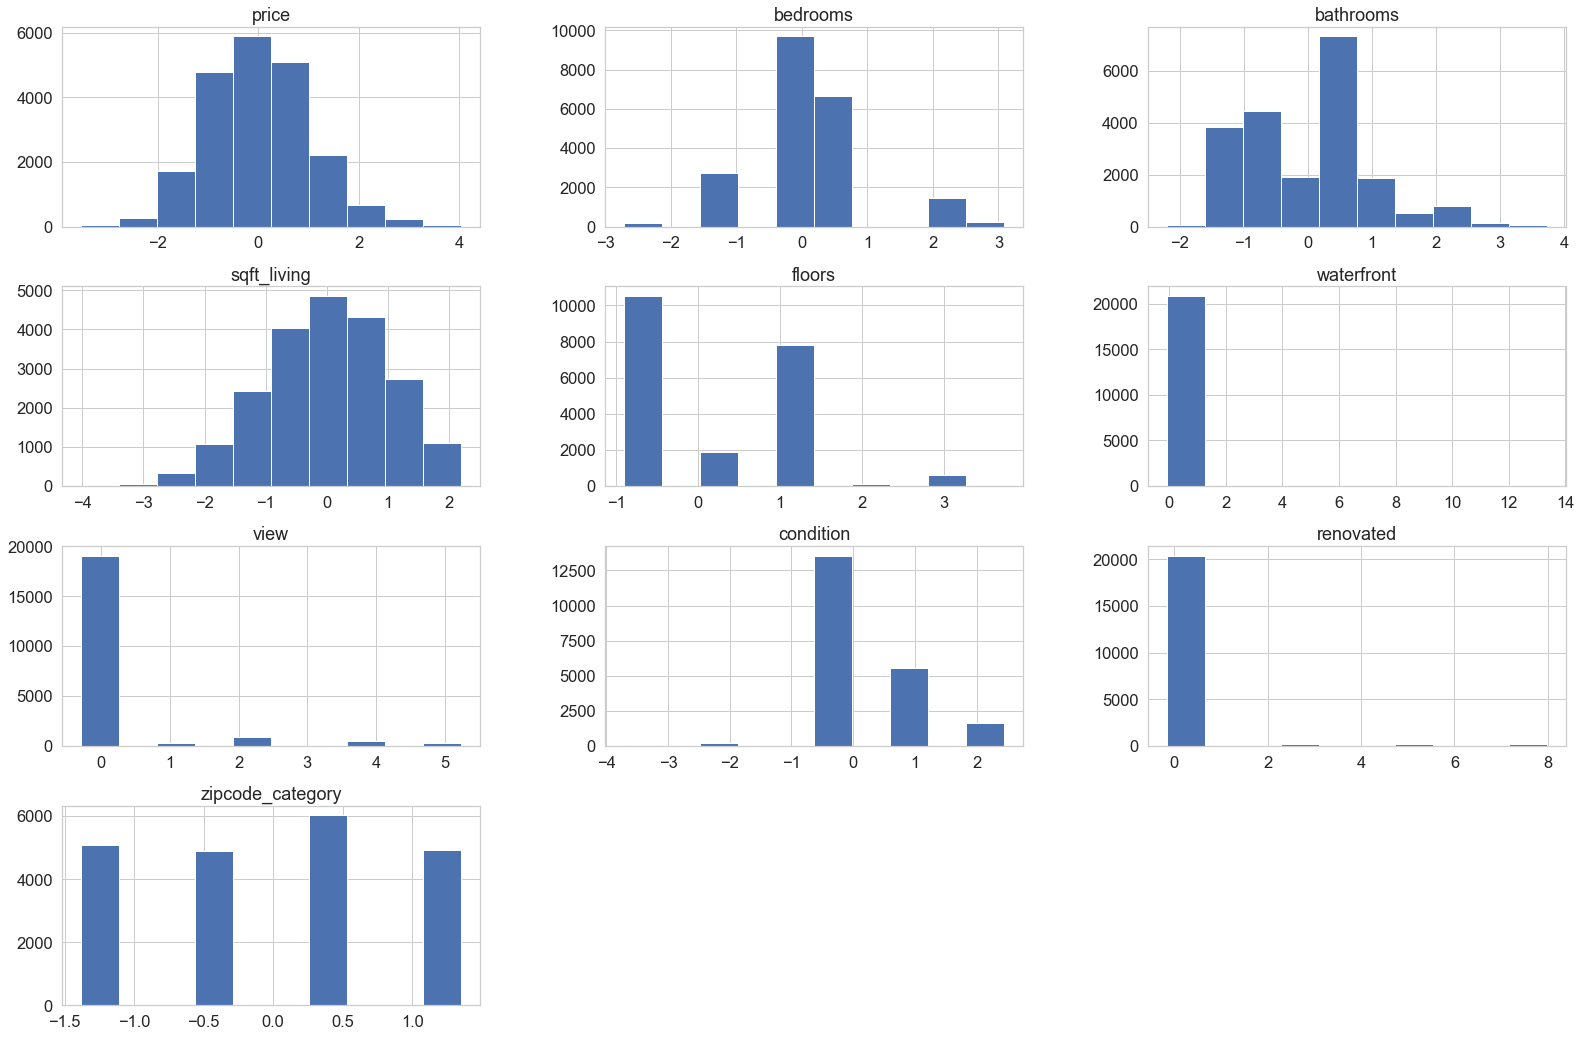

In [40]:
df['price'] = np.log(df['price'])
df['sqft_living'] = np.log(df['sqft_living'])
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled.hist(figsize=(24,18))

Looking slightly better, let's create dummy variables on our categoricals next.

In [41]:
#Create dummy variables for categoricals, apply to dataframe and drop columns
df['bedrooms'] = df['bedrooms'].astype('category')
bedrooms = pd.get_dummies(df['bedrooms'], prefix='bed', drop_first=True)

df['bathrooms'] = df['bathrooms'].astype('category')
bathrooms = pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True)

df['floors'] = df['floors'].astype('category')
floors = pd.get_dummies(df['floors'], prefix='fl', drop_first=True)

df['waterfront'] = df['waterfront'].astype('category')
waterfront = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)

df['view'] = df['view'].astype('category')
view = pd.get_dummies(df['view'], prefix='vw', drop_first=True)

df['condition'] = df['condition'].astype('category')
condition = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)

df['renovated'] = df['renovated'].astype('category')
renovated = pd.get_dummies(df['renovated'], prefix='ren', drop_first=True)

df['zipcode_category'] = df['zipcode_category'].astype('category')
zipcode_cat = pd.get_dummies(df['zipcode_category'], prefix='zip', drop_first=True)

In [42]:
df_final = pd.concat([scaled, bedrooms, bathrooms, floors, waterfront, view, condition, renovated, zipcode_cat], axis=1)
df_final.drop(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'renovated', 'zipcode_category'], axis=1, inplace=True)

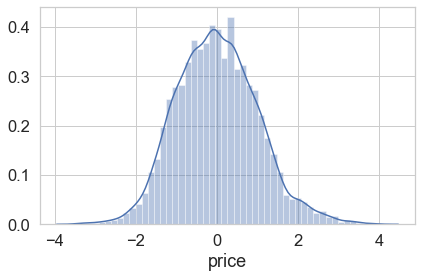

In [43]:
#Checking out our new distribution plots for continuous variables
sns.distplot(df_final['price'])

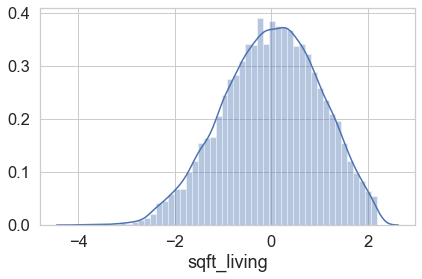

In [44]:
sns.distplot(df_final['sqft_living'])

Resembeling more normal distributions, still a tad skewed but now we should be ready to begin our model.

# Modeling

We will run an OLS model using sale price as the dependent variable.

In [45]:
#Let's look at our model summary in statsmodels
predictors = df_final.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1754.
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:45:45   Log-Likelihood:                 794.86
No. Observations:               20965   AIC:                            -1502.
Df Residuals:                   20921   BIC:                            -1152.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.1731      0.125     97.235      0.000      11.928      12.419
sqft_living     0.2475      0.003     84.763      0.000       0.242       0.253
bed_2          -0.0394      0.018     -2.195      0.028      -0.075      -0.004
bed_3          -0.1077      0.018     -5.975      0.000      -0.143      -0.072
bed_4          -0.1186      0.019     -6.391      0.000      -0.155      -0.082
bed_5          -0.1586      0.020     -8.105      0.000      -0.197      -0.120
bed_6          -0.2071      0.024     -8.506      0.000      -0.255      -0.159
bath_0.75       0.1808      0.120      1.508      0.132      -0.054       0.416
bath_1.0        0.2190      0.117      1.876      0.061      -0.010       0.448
bath_1.25       0.1629      0.140      1.162      0.245      -0.112       0.438
bath_1.5        0.1913      0.117      1.637      0.102      -0.038       0.420
bath_1.75       0.1864      0.117      1.596      0.111      -0.043       0.415
bath_2.0        0.1813      0.117      1.551      0.121      -0.048       0.410
bath_2.25       0.1940      0.117      1.660      0.097      -0.035       0.423
bath_2.5        0.1899      0.117      1.625      0.104      -0.039       0.419
bath_2.75       0.2162      0.117      1.847      0.065      -0.013       0.446
bath_3.0        0.2465      0.117      2.104      0.035       0.017       0.476
bath_3.25       0.3317      0.117      2.827      0.005       0.102       0.562
bath_3.5        0.3099      0.117      2.642      0.008       0.080       0.540
bath_3.75       0.4287      0.119      3.608      0.000       0.196       0.662
bath_4.0        0.3545      0.120      2.963      0.003       0.120       0.589
bath_4.25       0.4250      0.124      3.437      0.001       0.183       0.667
bath_4.5        0.3069      0.121      2.535      0.011       0.070       0.544
bath_4.75       0.3239      0.157      2.066      0.039       0.017       0.631
fl_1.5          0.0731      0.006     12.172      0.000       0.061       0.085
fl_2.0          0.0221      0.005      4.716      0.000       0.013       0.031
fl_2.5          0.1111      0.021      5.391      0.000       0.071       0.152
fl_3.0          0.0907      0.011      8.610      0.000       0.070       0.111
fl_3.5          0.0963      0.095      1.009      0.313      -0.091       0.283
wf_1.0          0.3671      0.026     13.970      0.000       0.316       0.419
vw_1.0          0.1969      0.013     14.668      0.000       0.171       0.223
vw_2.0          0.1855      0.008     22.633      0.000       0.169       0.202
vw_3.0          0.2669      0.012     23.188      0.000       0.244       0.289
vw_4.0          0.4224      0.018     23.725      0.000       0.387       0.457
cond_2          0.1455      0.047      3.092      0.002       0.053       0.238
cond_3          0.2803      0.044      6.44

Our R-squared of 0.783 indicates that approximately 78% of the data's variance can be explained by our model.  This is a solid starting point, however we have several p-values over the target of 0.05 that should be removed.  We can do this using stepwise selection.

In [46]:
#We can build a better fit with stepwise selection
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

Above we have incorporated a function which will return p-values under 0.05.  We will set our predictors and dependent variable X and y and call the function. 

In [47]:
X = df_final.drop('price', axis=1)
y = df_final['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  bath_1.0                       with p-value 0.0
Add  zip_4                          with p-value 0.0
Add  zip_3                          with p-value 0.0
Add  zip_2                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  vw_4.0                         with p-value 1.27655e-286
Add  vw_3.0                         with p-value 4.46655e-129
Add  vw_2.0                         with p-value 1.68018e-122
Add  cond_5                         with p-value 3.56389e-54
Add  vw_1.0                         with p-value 2.49091e-51
Add  wf_1.0                         with p-value 8.05886e-47
Add  bath_3.25                      with p-value 5.25106e-30
Add  bed_2                          with p-value 2.69948e-28
Add  ren_3                          with p-value 1.13119e-27
Add  fl_1.5                         with p-value 2.88764e-24
Add  bath_3.5                       with p-value 2.48737e-24
Add  bath_3.75                      with p-value 4.41437e-25


We will now use only these features and re-run our model.

In [48]:
#Re-testing the model
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y, X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     2350.
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:46:01   Log-Likelihood:                -13767.
No. Observations:               20965   AIC:                         2.760e+04
Df Residuals:                   20932   BIC:                         2.786e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.5271      0.087    -17.499      0.000      -1.698      -1.356
bath_1.0        0.0658      0.011      6.096      0.000       0.045       0.087
zip_4           1.4994      0.010    154.250      0.000       1.480       1.518
zip_3           1.1199      0.009    122.930      0.000       1.102       1.138
zip_2           0.5778      0.009     61.377      0.000       0.559       0.596
sqft_living     0.4851      0.005     95.750      0.000       0.475       0.495
vw_4.0          0.8552      0.036     24.019      0.000       0.785       0.925
vw_3.0          0.5392      0.023     23.424      0.000       0.494       0.584
vw_2.0          0.3754      0.016     22.915      0.000       0.343       0.408
cond_5          0.7673      0.088      8.754      0.000       0.596       0.939
vw_1.0          0.3972      0.027     14.781      0.000       0.345       0.450
wf_1.0          0.7398      0.053     14.080      0.000       0.637       0.843
bath_3.25       0.2865      0.022     13.326      0.000       0.244       0.329
bed_2           0.1275      0.011     11.520      0.000       0.106       0.149
ren_3           0.3401      0.031     10.871      0.000       0.279       0.401
fl_1.5          0.1424      0.012     11.932      0.000       0.119       0.166
bath_3.5        0.2421      0.020     12.234      0.000       0.203       0.281
bath_3.75       0.4802      0.043     11.245      0.000       0.397       0.564
ren_2           0.2957      0.035      8.387      0.000       0.227       0.365
cond_2          0.2750      0.094      2.921      0.003       0.090       0.460
fl_3.0          0.1867      0.021      9.092      0.000       0.146       0.227
cond_4          0.6201      0.087      7.120      0.000       0.449       0.791
cond_3          0.5406      0.087      6.212      0.000       0.370       0.711
fl_2.0          0.0482      0.008      5.757      0.000       0.032       0.065
fl_2.5          0.2260      0.041      5.489      0.000       0.145       0.307
bath_4.0        0.3323      0.051      6.526      0.000       0.233       0.432
bath_4.25       0.4751      0.081      5.886      0.000       0.317       0.633
bed_5          -0.0866      0.013     -6.427      0.000      -0.113      -0.060
bath_3.0        0.1155      0.018      6.251      0.000       0.079       0.152
bed_6          -0.1841      0.032     -5.757      0.000      -0.247      -0.121
ren_1           0.1651      0.039      4.183      0.000       0.088       0.242
bath_4.5        0.2386      0.063      3.796      0.000       0.115       0.362
bath_2.75       0.0537      0.015      3.640      0.000       0.025       0.083
==============================================================================
Omnibus:                      480.699   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarqu

Our R-squared did not change too much however we now have all p-values under 0.05 and can use our resulting features from stepwise selection in our final model.

In [49]:
#Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

15723 5242 15723 5242


In [50]:
#Fitting the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [51]:
#Calculating mean squared errors
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [52]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.2163511840137563
Test Mean Squarred Error: 0.22248232429762987


In [53]:
#Cross validating the mse
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X_with_intercept, y, cv=5, scoring=mse)
print(cv_5_results)
print(cv_5_results.mean())

[0.22304405 0.22282658 0.21818684 0.22547758 0.20613615]
0.21913423963795503


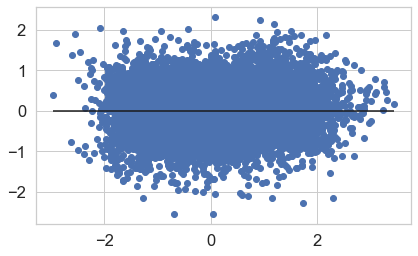

In [54]:
#Checking for heteroskedasticity / homoskedasticity
preds = linreg.predict(X_with_intercept)
residuals = y - preds
plt.scatter(preds, residuals)
plt.hlines(0, preds.min(), preds.max())

In [55]:
#Looking at our R-squared comparisons
model = linreg.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7835592094129578
0.7777066911482733


In [56]:
r2 = round(linreg.score(X_with_intercept,y), 3)
print("R Squared:", r2)

R Squared: 0.782


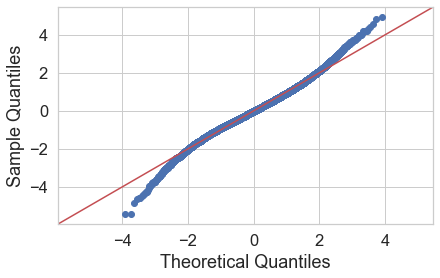

In [57]:
#Q-Q plot - checking for normality of residuals
import scipy.stats as stats
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

Text(0, 0.5, 'Predicted Test Prices ($)')

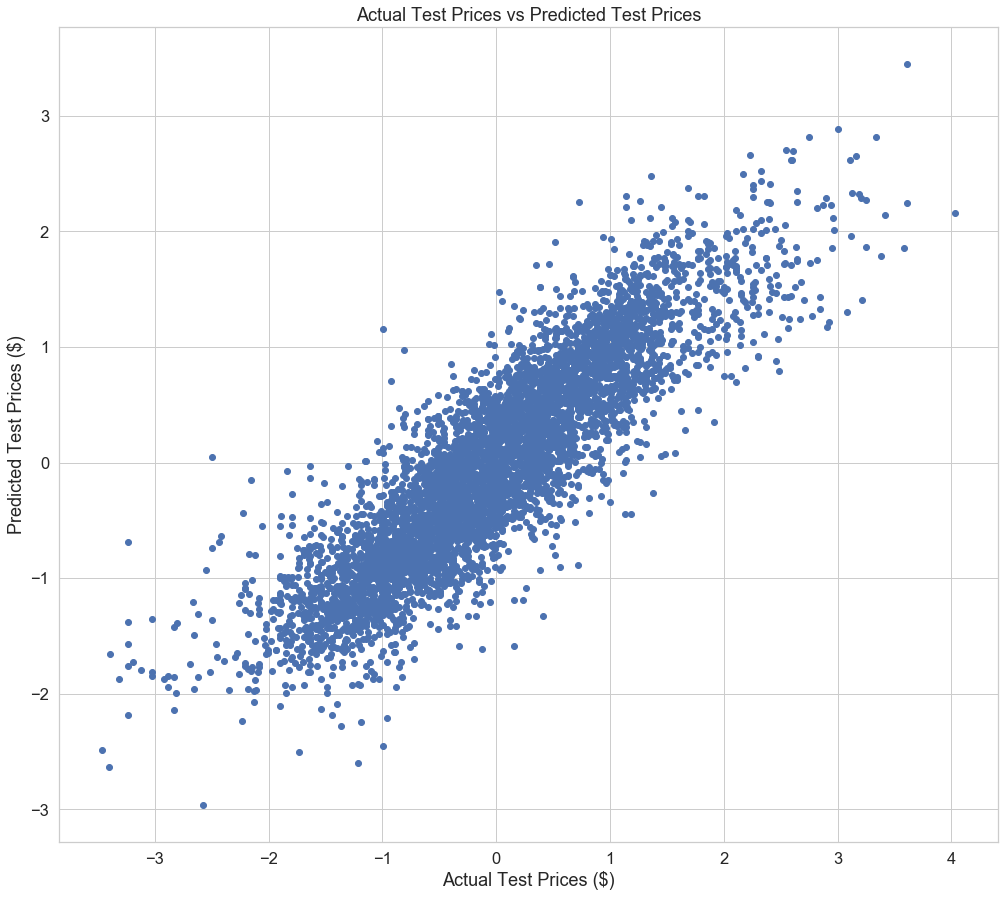

In [58]:
#Scatterplot with actual vs. predicted prices
plt.figure(figsize=(15, 15))
plt.scatter(y_test, y_hat_test)
plt.title('Actual Test Prices vs Predicted Test Prices')
plt.xlabel('Actual Test Prices ($)')
plt.ylabel('Predicted Test Prices ($)')